<a href="https://colab.research.google.com/github/yonas8989/wheat_crop_production_ml/blob/main/production_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import require version of pyton and other


In [25]:
import sys

assert sys.version_info >= (3, 7)

In [26]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Download the Data
from kagle.com


In [27]:
from pathlib import Path
import pandas as pd
from google.colab import drive

def load_csv_data(drive_path, csv_filename):
    """
    Loads a CSV file from Google Drive.

    Args:
        drive_path (str): Path to the directory in Google Drive containing the CSV file.
        csv_filename (str): Name of the CSV file to load.

    Returns:
        pd.DataFrame: Loaded data as a DataFrame.
    """
    # Mount Google Drive
    drive.mount('/content/drive')

    # Construct the full path to the CSV file
    file_path = Path("/content/drive/My Drive") / drive_path / csv_filename

    if not file_path.is_file():
        raise FileNotFoundError(f"The file {file_path} does not exist.")

    # Load the CSV file into a pandas DataFrame
    return pd.read_csv(file_path)

# Example usage
try:
    # Specify the folder and file name in your Google Drive
    folder_in_drive = ""  # e.g., "datasets" or leave as an empty string if the file is in the root of My Drive
    csv_file_name = "mock_india_data_200k.csv"

    agriculture_data = load_csv_data(folder_in_drive, csv_file_name)
except Exception as e:
    print("Error:", e)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
agriculture_data.head()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,31.659157,72.341565,44.072192,29.264916,0.356576,17.301551,0.765369,0.199313,1.552217,0.668593,...,1,912.060983,39.777421,24.213226,3.944768,349.381090,8.316536,0.160536,262,40.726244
1,24.552223,83.651481,33.811489,29.188423,0.406334,16.531581,0.782977,4.887975,1.749305,0.414971,...,0,1007.507349,35.063534,15.784410,6.667556,325.937464,6.852431,0.355840,103,33.169983
2,25.053288,72.861068,22.020405,12.163084,0.813958,18.337718,0.640384,4.381282,2.608996,0.086226,...,1,961.956996,46.148747,23.440943,3.062181,43.366895,9.812069,0.699876,351,95.409052
3,36.091315,72.719879,41.994364,28.916630,0.751695,17.915672,0.357538,0.520668,1.723544,0.645409,...,0,1019.797592,37.158386,24.796908,6.747123,333.584649,13.711991,0.628048,335,75.927453
4,18.960587,79.651551,35.074907,12.321231,0.675791,12.468106,0.494761,1.714945,3.272974,0.005980,...,1,948.058799,42.258091,24.457688,2.381484,111.257948,6.111509,0.051079,69,24.278898


In [29]:
agriculture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Latitude                200000 non-null  float64
 1   Longitude               200000 non-null  float64
 2   apparentTemperatureMax  200000 non-null  float64
 3   apparentTemperatureMin  200000 non-null  float64
 4   cloudCover              200000 non-null  float64
 5   dewPoint                200000 non-null  float64
 6   humidity                200000 non-null  float64
 7   precipIntensity         200000 non-null  float64
 8   precipIntensityMax      200000 non-null  float64
 9   precipProbability       200000 non-null  float64
 10  precipAccumulation      200000 non-null  float64
 11  precipTypeIsRain        200000 non-null  int64  
 12  precipTypeIsSnow        200000 non-null  int64  
 13  precipTypeIsOther       200000 non-null  int64  
 14  pressure            

As we can see the data is fully completed for each row


In [30]:
agriculture_data["Yield"].value_counts()

,count
Yield,
40.726244,1
21.988444,1
36.327898,1
96.279640,1
75.499789,1
...,...
36.691974,1
99.242222,1
55.565545,1


In [31]:
agriculture_data['Yield'].info();

<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: Yield
Non-Null Count   Dtype  
--------------   -----  
200000 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [32]:
agriculture_data.describe()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,22.477387,82.511188,32.498709,20.007869,0.500812,17.496816,0.649162,2.502638,2.493019,0.500698,...,0.49871,974.839558,37.503852,17.503459,5.513945,180.192867,7.502625,0.500109,182.128650,60.120722
std,8.369017,8.359161,7.198028,5.770943,0.288576,4.329797,0.201943,1.439704,1.440942,0.288785,...,0.50000,43.326799,7.216448,4.326156,2.598213,103.841526,4.329213,0.288679,105.476299,23.083178
min,8.000068,68.000020,20.000007,10.000216,0.000010,10.000035,0.300002,0.000054,0.000028,0.000033,...,0.00000,900.001013,25.000016,10.000099,1.000126,0.001719,0.000117,0.000003,0.000000,20.000569
25%,15.216047,75.280052,26.276031,15.028456,0.251240,13.736282,0.474415,1.261113,1.245206,0.250143,...,0.00000,937.275968,31.235225,13.763904,3.271270,90.266166,3.752884,0.250360,91.000000,40.113672
50%,22.485451,82.538473,32.500039,19.992886,0.500629,17.505235,0.648595,2.503443,2.487952,0.501144,...,0.00000,974.745741,37.527912,17.513862,5.515565,180.211757,7.499742,0.500438,182.000000,60.157944
75%,29.715143,89.718761,38.726467,24.986128,0.750860,21.239095,0.823866,3.746219,3.737596,0.751019,...,1.00000,1012.381076,43.755902,21.239794,7.766305,270.053158,11.246734,0.750532,273.000000,80.144426
max,36.999972,96.999965,44.999977,29.999763,0.999994,24.999926,0.999999,4.999981,4.999962,0.999991,...,1.00000,1049.998105,49.999993,24.999985,9.999976,359.998418,14.999899,0.999995,364.000000,99.999444


🧑 only three columns are numeric so that only this column have mean , std , min qurtile and and other as you can see above


# let me look out the the data in histogram


In [33]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "Production_prediction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

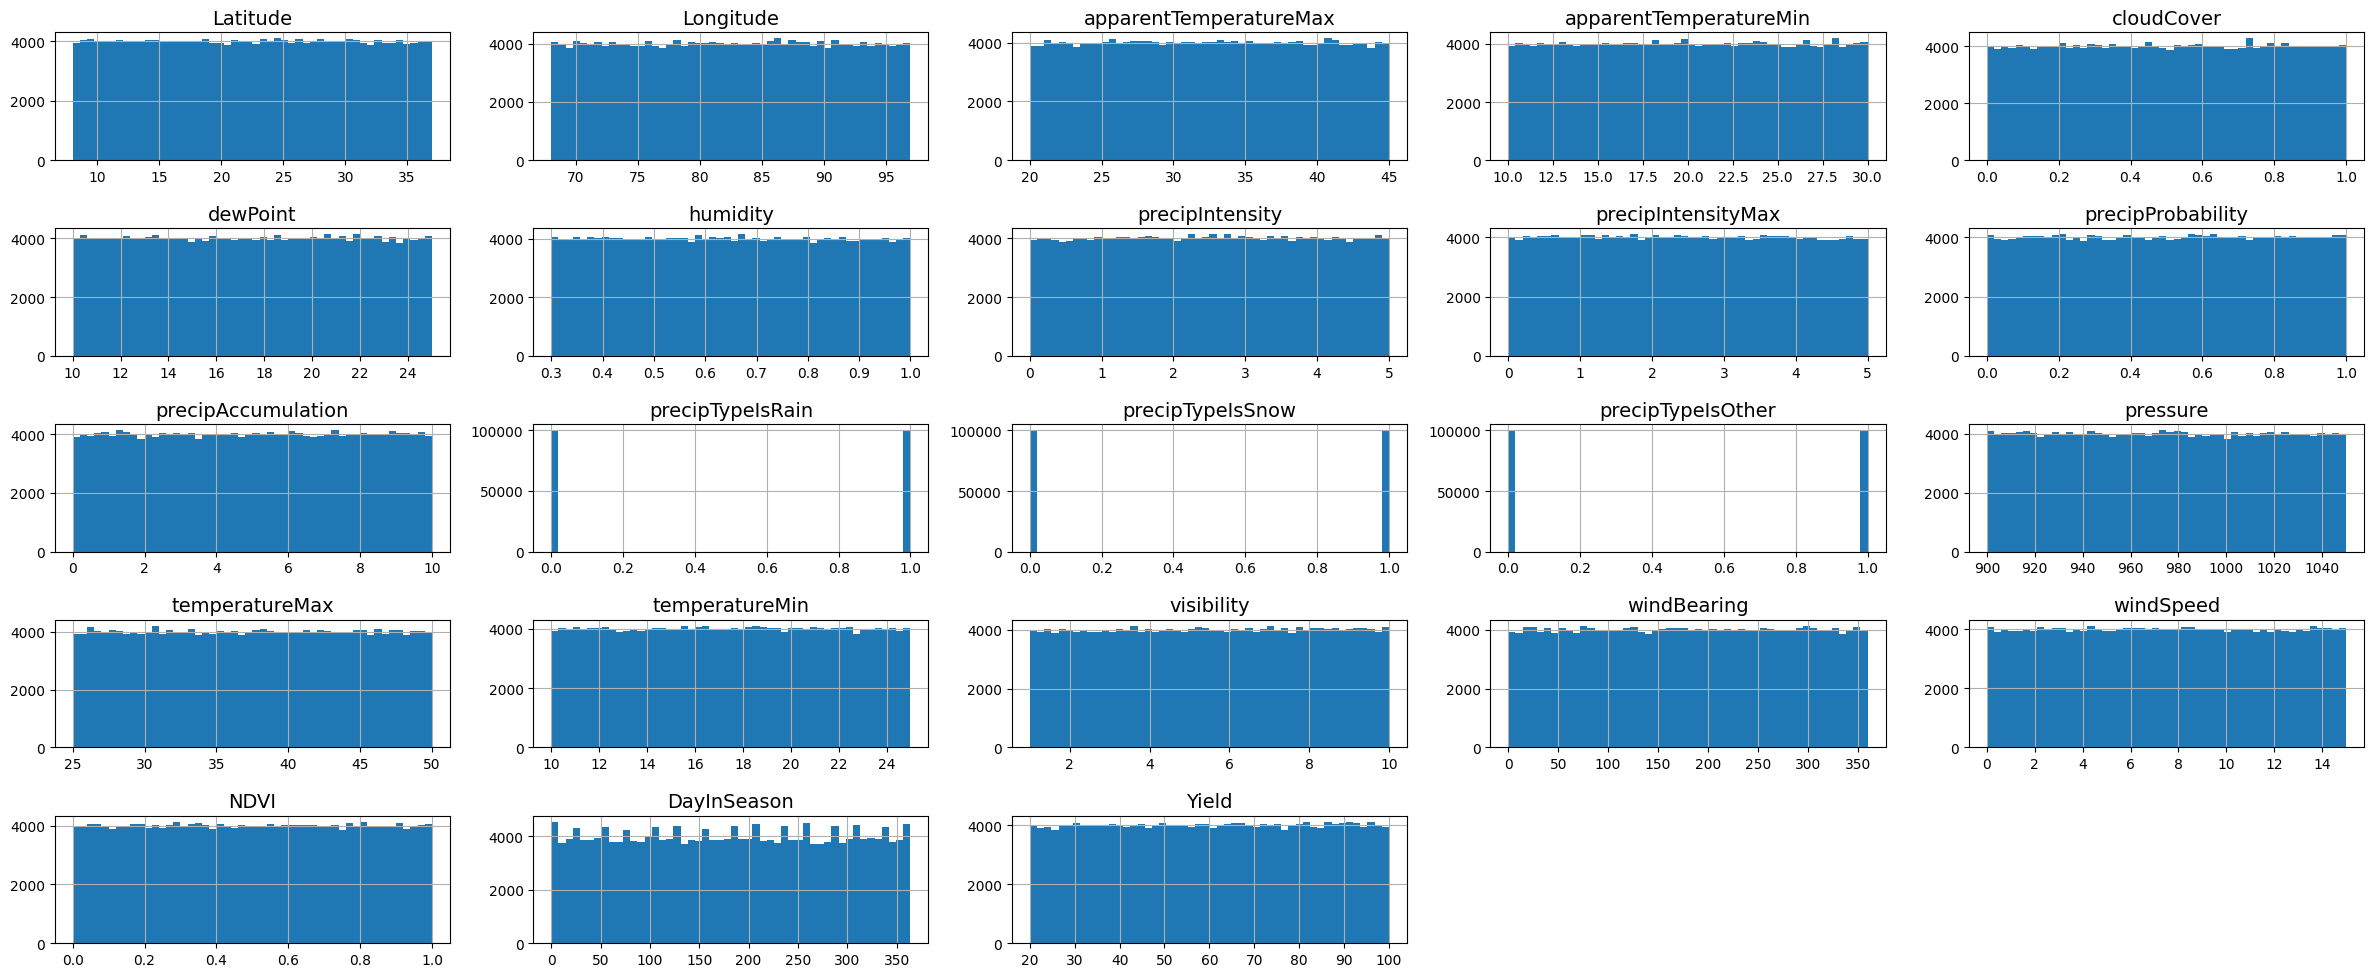

In [34]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

agriculture_data.hist(bins=50, figsize=(24, 10))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [35]:
agriculture_data.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Latitude                200000 non-null  float64
 1   Longitude               200000 non-null  float64
 2   apparentTemperatureMax  200000 non-null  float64
 3   apparentTemperatureMin  200000 non-null  float64
 4   cloudCover              200000 non-null  float64
 5   dewPoint                200000 non-null  float64
 6   humidity                200000 non-null  float64
 7   precipIntensity         200000 non-null  float64
 8   precipIntensityMax      200000 non-null  float64
 9   precipProbability       200000 non-null  float64
 10  precipAccumulation      200000 non-null  float64
 11  precipTypeIsRain        200000 non-null  int64  
 12  precipTypeIsSnow        200000 non-null  int64  
 13  precipTypeIsOther       200000 non-null  int64  
 14  pressure            

# create a Test set


in next code block we divide the data set in to test set and trainning test

In [36]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

we divide 20% for test and 80% for training

In [37]:
train_set, test_set = shuffle_and_split_data(agriculture_data, 0.2)
len(train_set)

160000

In [38]:
len(test_set)

40000

# Discover and visualize the data to gian insights



but first we copy the training set

In [39]:
agriculture_data = train_set.copy()

# visualizing Geographical Data

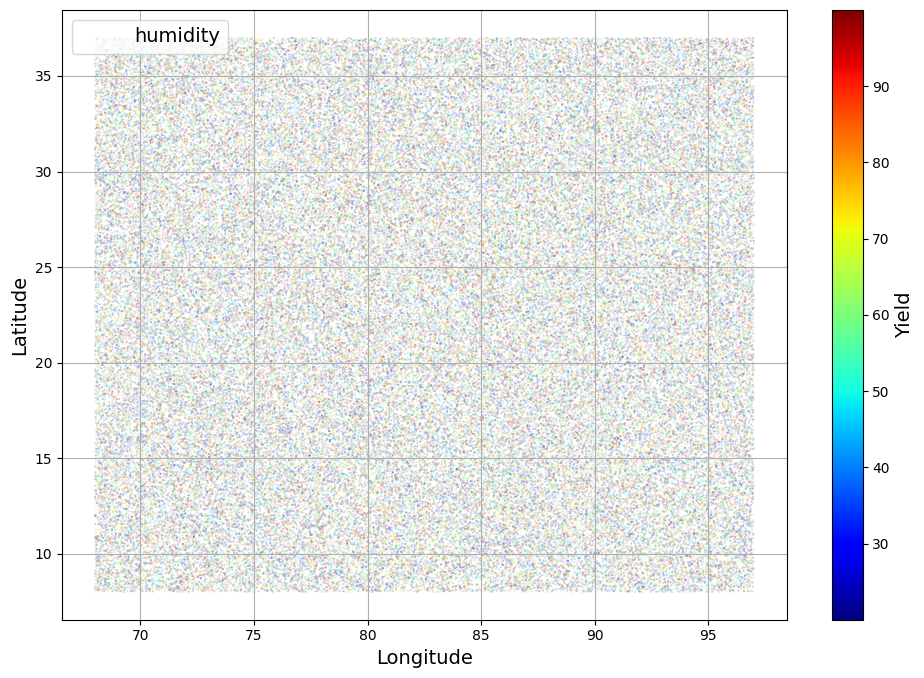

In [40]:
agriculture_data.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=agriculture_data["humidity"] / 100, label="humidity",
             c="Yield", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("agriculture_data_Yield_scatterplot")  # extra code
plt.show()


#look out the correlation between different parametersf

In [41]:
corr_matrix = agriculture_data.corr()

In [42]:
corr_matrix["Yield"].sort_values(ascending=False)

,Yield
Yield,1.000000
visibility,0.004183
precipTypeIsSnow,0.003644
windBearing,0.003365
DayInSeason,0.002339
precipTypeIsRain,0.001515
apparentTemperatureMin,0.001456
windSpeed,0.001440
precipTypeIsOther,0.000117
Latitude,0.000023


graphical way to see the correlation

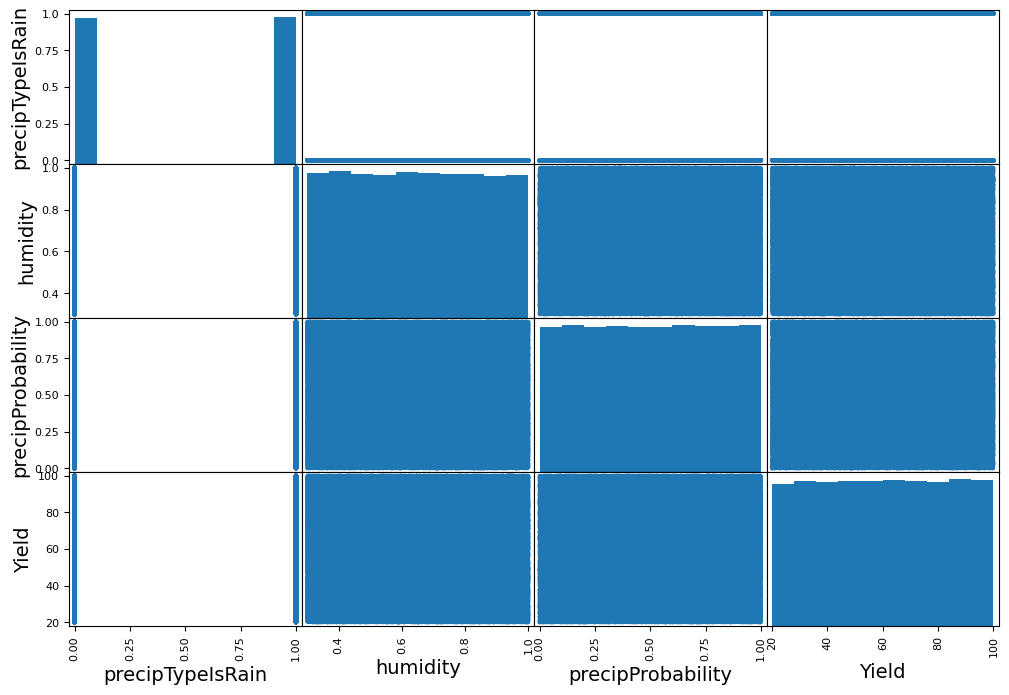

In [45]:
from pandas.plotting import scatter_matrix

attributes = ["precipTypeIsRain", "humidity", "precipProbability", "Yield"]
scatter_matrix(agriculture_data[attributes], figsize=(12, 8))
plt.show()